<a href="https://colab.research.google.com/github/Migaalee/machine_learning/blob/main/Tutorials_AA_Migla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.

# Import all packages that will be used

In [73]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

#ScikitLearn

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold

from sklearn.neighbors import KernelDensity

from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

from scipy.stats import mode

from google.colab import files #this is to load files from your local disk

from sklearn.svm import LinearSVC

from sklearn.svm import SVC


In [ ]:
data = files.upload()
 

Saving data.txt to data.txt


# Store all functions from the classes that might be useful

In [ ]:
# Function to exapnd data to get different models

def poly_16features(X):
    """Expand data polynomially
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+14))
    X_exp[:,:2] = X 
    X_exp[:,2] = X[:,0]*X[:,1]
    X_exp[:,3] = X[:,0]**2
    X_exp[:,4] = X[:,1]**2
    X_exp[:,5] = X[:,0]**3
    X_exp[:,6] = X[:,1]**3
    X_exp[:,7] = X[:,0]**2*X[:,1]
    X_exp[:,8] = X[:,1]**2*X[:,0]
    X_exp[:,9] = X[:,0]**4
    X_exp[:,10] = X[:,1]**4
    X_exp[:,11] = X[:,0]**3*X[:,1]
    X_exp[:,12] = X[:,1]**3*X[:,0]
    X_exp[:,13] = X[:,0]**2*X[:,1]**2
    X_exp[:,14] = X[:,0]**5
    X_exp[:,15] = X[:,1]**5        
    return X_exp

def poly_mat(reg,X_data,feats,ax_lims):
    """create score matrix for contour
    """
    Z = np.zeros((200,200))
    xs = np.linspace(ax_lims[0],ax_lims[1],200)
    ys = np.linspace(ax_lims[2],ax_lims[3],200)
    X,Y = np.meshgrid(xs,ys)
    points = np.zeros((200,2))
    points[:,0] = xs
    for ix in range(len(ys)):
        points[:,1] = ys[ix]
        x_points=poly_16features(points)[:,:feats]
        Z[ix,:] = reg.decision_function(x_points)
    return (X,Y,Z)

def create_plot(X_r, Y_r, X_t, Y_t, feats, best_c):
    """create imege with plot for best classifier"""
    ax_lims=(-3,3,-3,3)
    plt.figure(figsize=(8,8), frameon=False)
    plt.axis(ax_lims)
    reg = LogisticRegression(C=best_c, tol=1e-10)
    reg.fit(X_r,Y_r)
    plotX,plotY,Z = poly_mat(reg,X_r,16,ax_lims)
    plt.contourf(plotX,plotY,Z,[-1e16,0,1e16], colors = ('b', 'r'),alpha=0.5)
    plt.contour(plotX,plotY,Z,[0], colors = ('k'))
    plt.plot(X_r[Y_r>0,0],X_r[Y_r>0,1],'or')
    plt.plot(X_r[Y_r<=0,0],X_r[Y_r<=0,1],'ob')
    plt.plot(X_t[Y_t>0,0],X_t[Y_t>0,1],'xr',mew=2)
    plt.plot(X_t[Y_t<=0,0],X_t[Y_t<=0,1],'xb',mew=2)
    plt.savefig('final_plot.png', dpi=300)
    plt.close()
    

# Calculate training and validation errors for each fold using Brier score
def calc_fold(feats, X,Y, train_ix,test_ix,C=1e12):  #number of features, matrix with features, label classes, indexes to use for points in training and validation, large C regularization parameter (=almost no regularization)
  """return classification error for train and test sets"""
  reg = LogisticRegression(C=C, tol=1e-10) # make logistic regression object
  reg.fit(X[train_ix,:feats],Y[train_ix]) # fit with data that was chosen by kfold for training, :feats will fit 6 features if we say 6 in a function
  prob = reg.predict_proba(X[:,:feats])[:,1] #Brier score, which is specific for logistic. Computes prob that point belongs to class 1 [:,1] using all features X[:,:feats]
  squares = (prob-Y)**2 #Brier
  return (np.mean(squares[train_ix]),np.mean(squares[test_ix]))

#instead of calculating Brier score we could use "test_error = 1-reg.score(X_t,Y_t)". This would compare different classifiers

# FUNCTIONS FOR K-NN classifier

# Defining Minkowski distance, p=2, euclidean
def mink_dist(x,X, p=2): #x is a vector of coordinates of one point we are trying to predict, X the matrix of all coordinates in the training set
  sq_diff = np.power(np.abs(X-x),p) 
  dists = np.power(np.sum(sq_diff,1), 1.0/p) # argument 1 in np.sum means that sum is going to be made in axis = 1, it is a columns of the matrix X
  return dists #gets a vector of distances


def k_nearest_ixs(x,X,k): #finding k-nearest neighbours 
  ixs = np.argsort(mink_dist(x,X))
  return ixs[:k]

def knn_classify(x,X,Y,k): #Y is class labels
  ix = k_nearest_ixs(x,X,k) #return class that has a majority of class in k nearest neighbours
  return mode(Y[ix,0], axis = None)[0][0] #return 2 arrays, mode and counts.[0]-mode[0]-most common label


# Functions for Kernel regression

#Gausian kernel

def gaussian(u):
  k=np.e**(-0.5*u**2)/np.sqrt(2*np.pi)
  return k

# Nadaraya-Watson estimator


def nad_wat(K, h, X, Y,x):
  num=0
  den=0
  for ix in range(len(X)): #iterating through all datasets
    u = (x-X[ix])/h 
    k=K(u)
    num = num + Y[ix]*k
    den = den+k
  return num/den






# Tutorial 1

In [ ]:
data = files.upload()

Saving planets.csv to planets.csv


In [ ]:
def load_planet_data(file_name):
    """Return matrix with orbital radius and period"""
    rows=[]
    lines=open(file_name).readlines()
    for line in lines[1:]:
        parts=line.split(',')
        rows.append((float(parts[1]),float(parts[2])))
    return numpy.array(rows)

data=load_planet_data('planets.csv')



### Exercise 1.5

In [ ]:
import math
pi=numpy.pi
r1=0.72*1.496e11
T1=0.62*3.16e7
G=6.67e-11

#This is formula that calculates M
M=(4*math.pow(math.pi,2)*math.pow(r1,3))/(math.pow(T1,2)*6.67e-11)
print(M)


r=data[:,0]*1.496e11
T=data[:,1]*3.16e7
print(r)
print(T)


d=4*pow(numpy.pi,2)*pow(data[:,0]*1.496e11,3)/(pow(data[:,1]*3.16e7,2)*G)

print(d)


mean=numpy.mean(d)
print(mean)
stdev=numpy.std(d)
print(stdev)

1.9269419362950405e+30
[5.834400e+10 1.077120e+11 1.496000e+11 2.273920e+11 7.779200e+11
 1.427184e+12 2.869328e+12 4.496976e+12]
[7.584000e+06 1.959200e+07 3.160000e+07 5.940800e+07 3.747760e+08
 9.309360e+08 2.654716e+09 5.207680e+09]
[2.04374099e+30 1.92694194e+30 1.98451560e+30 1.97183052e+30
 1.98378760e+30 1.98533664e+30 1.98398488e+30 1.98475558e+30]
1.9831117180025922e+30
2.9514956874944806e+28


[ 0.1079885   2.30608244 -1.56589092]


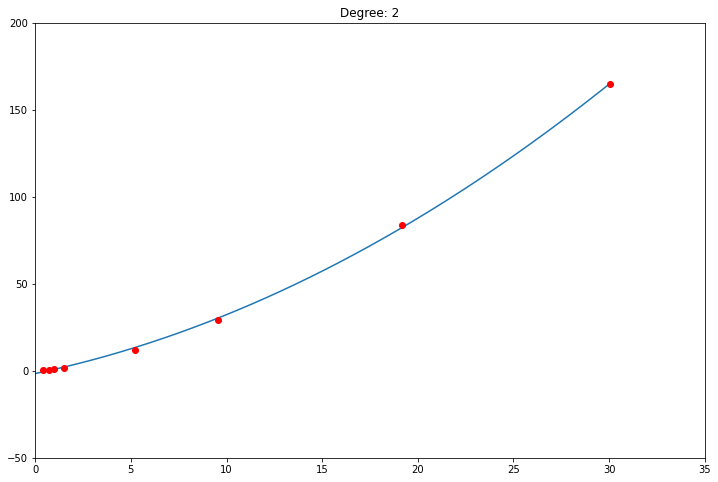

In [ ]:
x = data[:,0]
y = data[:,1]
coefs = np.polyfit(x,y,2)

print(coefs)

pxs = np.linspace(0,max(x),200)
poly = np.polyval(coefs,pxs)

#Plot figure 

plt.figure(figsize=(12, 8))
plt.axis([0,35,-50,200])
plt.plot(pxs, poly, '-')
plt.plot(x, y, 'or')
plt.title('Degree: 2')
plt.show()
#plt.savefig('polynomial.png') either save or display on console, both wont work
plt.close()

### Exercise 1.6

In [ ]:
mat = files.upload()

Saving polydata.csv to polydata.csv


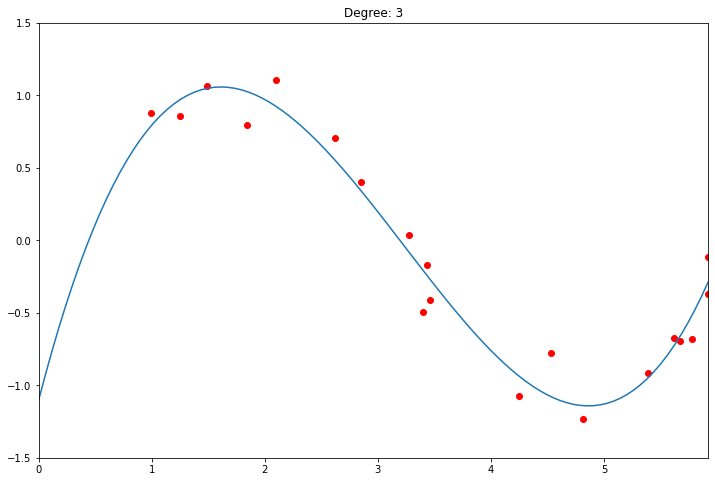

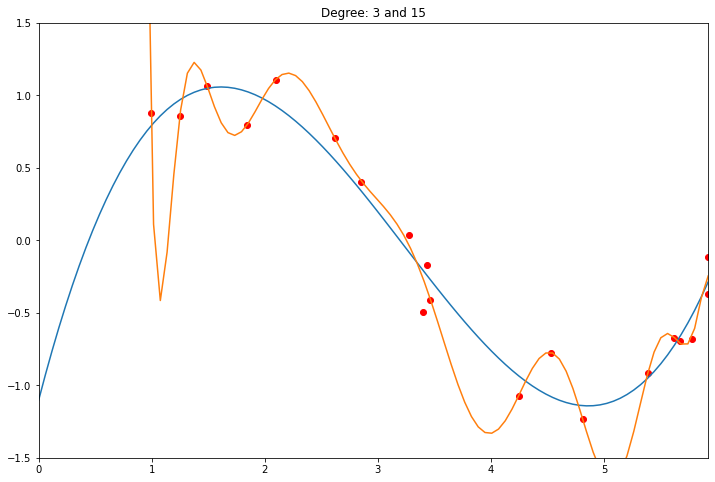

In [ ]:
mat = np.loadtxt('polydata.csv',delimiter=';')
x = mat[:,0]
y = mat[:,1]
coefs_3 = np.polyfit(x,y,3)
coefs_15=np.polyfit(x,y,15)
pxs = np.linspace(0,max(x),100)
poly = np.polyval(coefs_3,pxs)
poly15 = np.polyval(coefs_15,pxs)

#Third degree poly
plt.figure(figsize=(12, 8))
plt.plot(x,y,'or')
plt.plot(pxs,poly,'-')
plt.axis([0,max(x),-1.5,1.5])
plt.title('Degree: 3')
plt.show()
#plt.savefig('degree3.png')
plt.close()


#15th degree poly superimposed


plt.figure(figsize=(12, 8))
plt.plot(x,y,'or')
plt.plot(pxs,poly,'-')
plt.plot(pxs,poly15,'-')
plt.axis([0,max(x),-1.5,1.5])
plt.title('Degree: 3 and 15')
plt.show()
#plt.savefig('degree3.png')
plt.close()


# Tutorial 2

In [ ]:
data = files.upload()

Saving data.txt to data (2).txt


##### Load data and scale data

In [ ]:
data = np.loadtxt("bluegills.txt", delimiter="\t",skiprows=1)
x,y = (data[:,0], data[:,1])
#print(mat)
means = np.mean(data,0)
devs = np.std(data,0)
data = (data-means)/devs

##### Split data into training, test and validation datasets

In [ ]:
def random_split(data,test_points):
 """return two matrices splitting the data at random
 """
 ranks = np.arange(data.shape[0])
 np.random.shuffle(ranks)
 train = data[ranks>=test_points,:]
 test = data[ranks<test_points,:]
 return train,test

train, temp = random_split(data, 39)
valid, test = random_split(temp, 20)

##### Find the best model (hypothesis class)

In [ ]:
def mean_square_error(data,coefs):
 """Return mean squared error
 X on first column, Y on second column
 """
 pred = np.polyval(coefs,data[:,0])
 error = np.mean((data[:,1]-pred)**2)
 return error

best_err = 10000000 # very large number
for degree in range(1,7):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = mean_square_error(valid,coefs)
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree
        
test_error = mean_square_error(test,best_coef)
print('The best degree is',best_degree,'\n', 'The test error is', test_error)

The best degree is 5 
 The test error is 0.3010468614112063


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


##### Plot data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


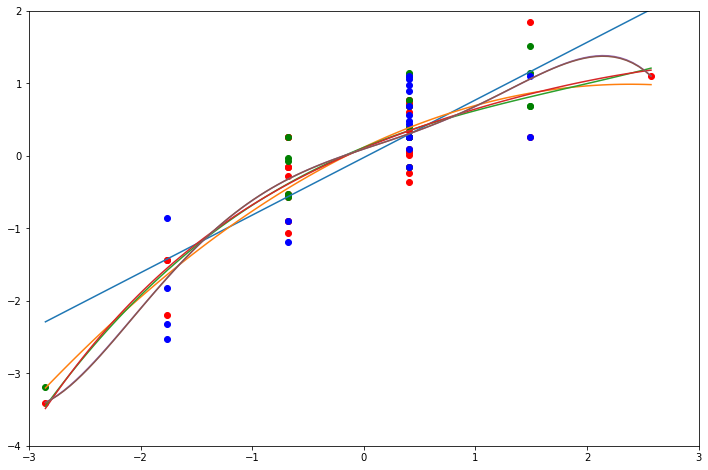

In [ ]:
coefs=[] #save 
poly=[]
pxs = np.linspace(min(data[:,0]),max(data[:,0]),100) #where we should start coordinates

for degree in range(1,7):
    coefs.append(np.polyfit(train[:,0],train[:,1],degree))
    poly.append(np.polyval(coefs[degree-1],pxs))
    
plt.figure(figsize=(12, 8))
plt.plot(train[:,0], train[:,1],'bo', color='red')
plt.plot(valid[:,0], valid[:,1],'bo', color='green')
plt.plot(test[:,0], test[:,1],'bo', color='blue')
for py in poly:
    plt.plot(pxs,py)
plt.axis([-3,3,-4,2])
plt.show()

# Tutorial 3

In [ ]:
data = files.upload()

Saving data.txt to data (3).txt


In [ ]:
mat = np.loadtxt("data.txt", delimiter=",")
#print(mat)

###### Load, shuffle and standardize features

In [ ]:
data = shuffle(mat)
Ys = data[:,0]
Xs = data[:,1:]
means = np.mean(Xs, axis = 0)
stdvs = np.std(Xs,axis = 0)
Xs = (Xs-means)/stdvs
#print(Xs)

##### Expand features to create different models

In [ ]:
Xs = poly_16features(Xs)
#print(Xs)

### Use stratified sampling and split data into training and testing

In [ ]:
X_r, X_t, Y_r, Y_t = train_test_split(Xs, Ys, test_size = 0.33, stratify = Ys) # why do we stratify class labels and not Xs and Ys together

##### Generate fold indexes with kfold and StratifiedFold (examples)

In [ ]:
#Using just kfold
#kf = KFold(n_splits=10)
#for train, valid in kf.split(Xr):
#  print(train,valid)



In [ ]:
#Using stratified kfold (so that classes are distributed proportionally)
#kf2 = StratifiedKFold(n_splits=10)
#for train, valid in kf2.split(Yr,Yr):
#  print(train, valid)


##### Split using 10 fold Stratified sampling and calculate errors (Brier score in this example)

In [ ]:
train_err=[]
valid_err=[]
folds = 10
kf = StratifiedKFold(n_splits=folds)
for feats in range(2,16):
  tr_err = va_err = 0
  for tr_ix,va_ix in kf.split(Y_r,Y_r):
    r,v = calc_fold(feats,X_r,Y_r,tr_ix,va_ix)
    tr_err += r
    va_err += v
  train_err.append(tr_err/folds)
  valid_err.append(va_err/folds)
  print(feats,':', tr_err/folds,va_err/folds)

2 : 0.05682780721981258 0.07518673576232612
3 : 0.05710363297432325 0.07895610864014396
4 : 0.05486624428478243 0.08086969016667966
5 : 0.05327126859137592 0.08575113012975802
6 : 3.135983585615772e-19 0.05497366312447607
7 : 5.1662056419648766e-20 0.0581180355927707
8 : 8.116937364888027e-20 0.05808462013103906
9 : 2.892678227271235e-20 0.03329383901249165
10 : 3.436336453159118e-20 0.04307050004171521
11 : 1.9164165014732522e-19 0.049986216426656786
12 : 3.17192884385211e-20 0.04831309541539745
13 : 8.84289023128983e-20 0.05001284626552925
14 : 7.876708367126208e-20 0.06617690543134891
15 : 5.2301603941477794e-20 0.049987289157096486


#####  Plot the training and crossvalidation error for the different models to select the best one.

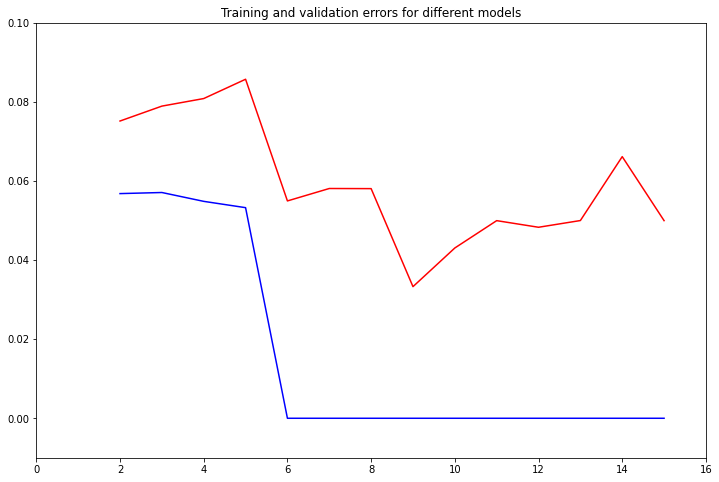

In [ ]:
feats= np.array(range(2,16))
plt.figure(figsize=(12, 8))
plt.plot(feats, train_err, c='b')
plt.plot(feats, valid_err, c='r')
plt.axis([0, 16,-0.01,0.1])
plt.title('Training and validation errors for different models')
plt.show()
plt.close()


##### Choose best model

In [ ]:
print("best model is: ", str(np.argmin(valid_err)+2))

best model is:  9




```
# This is formatted as code
```

##### Calculate test error based on the model with 9 features

In [ ]:
reg = LogisticRegression(C=1e12, tol=1e-10)
reg.fit(X_r[:,:9],Y_r) #re-fit all training data with training dataset 
prob = reg.predict_proba(X_t[:,:9])[:,1] # do not forget to calculate error with test!!! dataset
squares = (prob-Y_t)**2
print ('The test error is', np.mean(squares))

The test error is 8.96849134418222e-19


# Tutorial 6

In [ ]:
"""
Auxiliary function for Tutorial 4
"""

import matplotlib.pyplot as plt
import numpy as np


def plot_svm(data,sv,f_name,C):
    plt.figure(figsize=(5,5))
    plt.title(f'Regularization factor (C) of {C}')
    pxs = np.linspace(-2.5,2.5,200)
    pys = np.linspace(-2.5,2.5,200)        
    pX,pY = np.meshgrid(pxs,pys)
    pZ = np.zeros((len(pxs),len(pys)))
    xts = np.zeros((len(pxs),2))
    xts[:,1] = pys
    for col in range(len(pxs)):
        xts[:,0] = pxs[col]
        pZ[:,col] = sv.decision_function(xts)    
    y = data[:,-1]
    plt.plot(data[y<0,0],data[y<0,1],'o',mec='k')    
    plt.plot(data[y>0,0],data[y>0,1],'o',mec='r')
    plt.contourf(pX, pY, pZ, [-1e9, 0, 1e9],
                 colors = ('b','r'), alpha=0.2)
    plt.contour(pX, pY, pZ, [-1, 0, 1], linewidths =(2,3,2), colors = 'k',
                linestyles='solid')
    plt.show
    #plt.savefig(f_name,dpi=300,bbox_inches="tight")

In [ ]:
data4=files.upload()

Saving T4data.txt to T4data.txt


In [ ]:
data4 = np.loadtxt("T4data.txt", delimiter = None)
print(np.shape(data4))
#print((data4))

(200, 3)


In [ ]:
# Standardize training dataset
Y_4 = data4[:,2] #classes
X_4 = data4[:,:2] #features
means_r = np.mean(X_4, axis = 0)
stdvs_r = np.std(X_4,axis = 0)
X_4 = (X_4-means_r)/stdvs_r

Fit linear SVM

In [ ]:
svm001 = SVC(gamma='auto', kernel = 'linear', C = 0.01) 
svm001 = svm01.fit(X_4,Y_4)
svm1 = SVC(gamma='auto', kernel = 'linear', C = 1) 
svm1 = svm1.fit(X_4,Y_4)
svm100 = SVC(gamma='auto', kernel = 'linear', C = 1000) 
svm100 = svm10.fit(X_4,Y_4)

Plot data

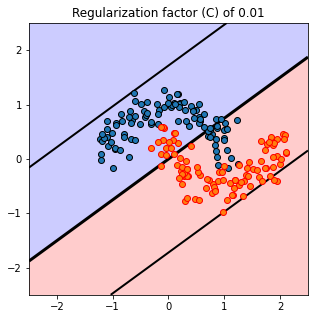

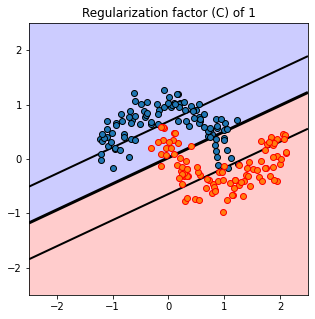

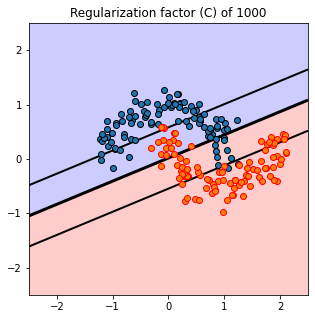

In [ ]:
plot_svm(data4,svm01,f_name=svm, C= 0.01)
plot_svm(data4,svm1,f_name=svm, C= 1)
plot_svm(data4,svm10,f_name=svm, C= 1000)

##### indexes of the support vectors in the data used for fitting

In [ ]:
#svm001.support_
#svm1.support_
svm100.support_


array([  8,  11,  12,  13,  22,  31,  35,  48,  49,  51,  64,  66,  79,
        84,  85,  86,  98, 102, 111, 112, 129, 135, 139, 149, 155, 163,
       167, 168, 170, 180,   5,  10,  29,  40,  41,  43,  44,  46,  47,
        60,  67,  74,  77,  82,  87,  89, 117, 126, 127, 138, 144, 145,
       151, 174, 176, 182, 183, 184, 187], dtype=int32)

##### with the product of the alpha values by class labels (-1 and 1) for the support vectors (the coefficients for the dual problem)

In [ ]:
svm001.dual_coef_
#svm1.dual_coef_
#svm100.dual_coef_

array([[-0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.00580814, -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.00286743, -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      ,  0.01      ,  0.0

Kernel trick

Optimize kernel parameters and compare
classifiers

# Tutorial 7

# Tutorial 8

# Tutorial 9

In [53]:
from pandas import read_csv
import matplotlib.pyplot as plt

### Useful functions from lectures

In [54]:
from sklearn.datasets import load_iris
#iris = load_iris()
#X = iris.data
#y = iris.target

In [55]:
data = files.upload()

Saving iris.data to iris (1).data


In [79]:
iris = pd.read_csv("iris.data", delimiter=",")

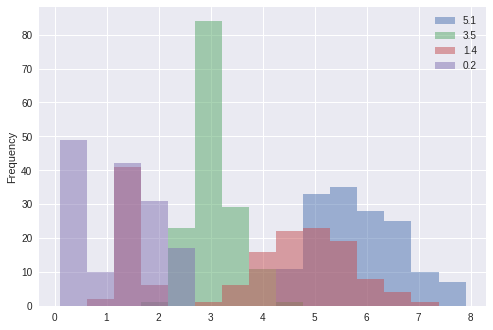

In [80]:
plt.style.use('seaborn')
iris.plot(kind='hist', bins=15, alpha=0.5)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe85c8bb150>,
      dtype=object)

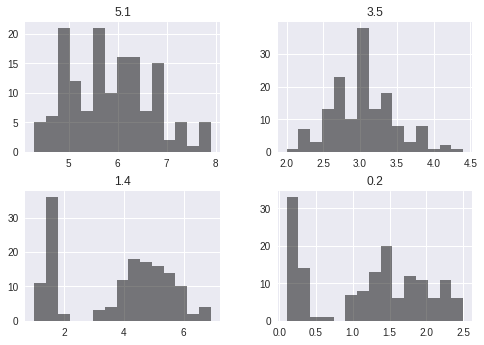

In [81]:
iris.hist(color='k', alpha=0.5, bins=15)

Examining individual features: Box plot

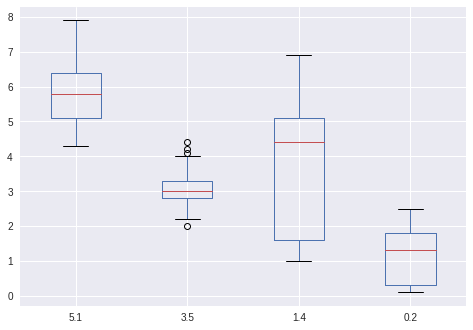

In [82]:
iris.plot(kind='box')

Scatter Matrix plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe85fc77110>,
      dtype=object)

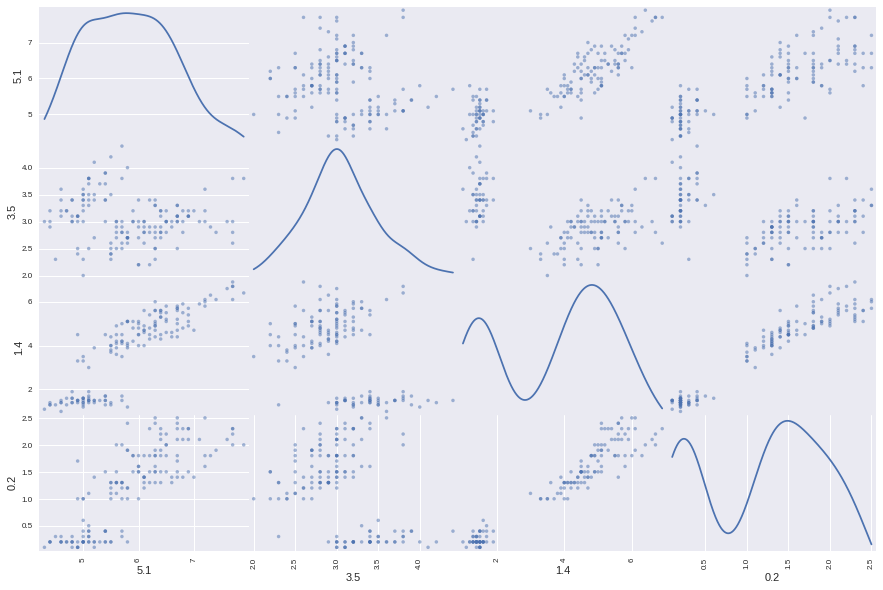

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.5, figsize=(15,10), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe86062e8d0>,
      dtype=object)

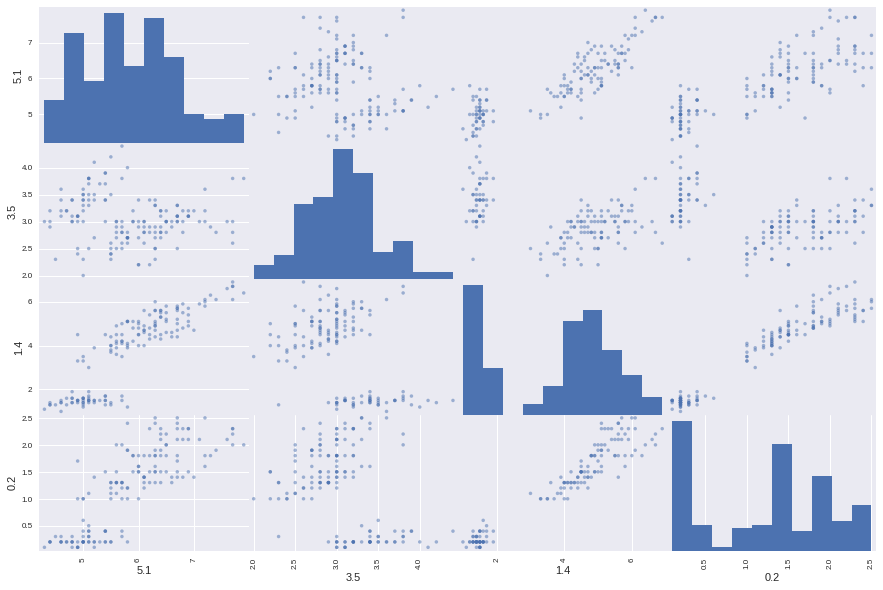

In [48]:
scatter_matrix(iris, alpha=0.5, figsize=(15,10), diagonal='hist')

Parallel coordinates plot

In [66]:
from pandas.plotting import parallel_coordinates
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

Andrew's curves

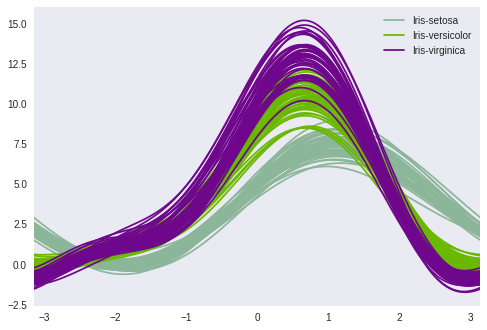

In [95]:
from pandas.plotting import andrews_curves
andrews_curves(iris, 'Iris-setosa')

### 7.1 Feature Selection

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Now use the f_classif function from the sklearn.feature_selection the ANOVA F-value
for each feature, considering the class labels

Manually select the best features

 Repeat this exercise using the SelectKBest class (just for comparison)

Plot the data projected on the two selected features

### 7.2 Feature Extraction with PCA

### 7.3 Vector Quantization

Download the vegetables.png image file to your working folder

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d
from skimage.io import imsave,imread
from google.colab import files #this is to load files from your local disk


In [4]:
image = files.upload()

Saving vegetables.png to vegetables.png


In [9]:
img = imread("vegetables.png")
w,h,d = img.shape
cols = np.reshape(img/255.0, (w * h, d)) #We will convert this into floating point values between 0-1 by dividing the matrix by 255.0


In [10]:
print(cols) #This is the matrix we will use for the K-Means quantization.

[[0.0627451  0.0627451  0.05490196]
 [0.07058824 0.07058824 0.0627451 ]
 [0.06666667 0.06666667 0.05882353]
 ...
 [0.16862745 0.14509804 0.43921569]
 [0.15686275 0.1254902  0.41568627]
 [0.15686275 0.12941176 0.35686275]]


Use the KMeans class from the sklearn.cluster module to compute 64 centroids and
then convert all the colours to the nearest centroid.

You can get the centroid positions from the
cluster_centers_ attribute of your K-Means object and the labels from the predict method.
Look up the example on Lecture 17 and the documentation on the K-Means class.

To convert the
colours you just need to assign the nearest centroid values to the pixel colour values

In [ ]:
c_cols = np.zeros(cols.shape)
for ix in range(cols.shape[0]):
  c_cols[ix,:]=centroids[labels[ix]]

Reshape the colours matrix into an image matrix and save it

In [ ]:
final_img = np.reshape(c_cols,(w,h,3))
imsave('image.png',final_img) #w and h variables store the width and the height of the original image

### 7.4 Appendix: plotting code

In [15]:
#This is the code for the plotting function used in the Iris exercises.
def plot_iris(X,y,file_name):
  plt.figure(figsize=(7,7))
  plt.plot(X[y==0,0], X[y==0,1],'o', markersize=7, color='blue', alpha=0.5)
  plt.plot(X[y==1,0], X[y==1,1],'o', markersize=7, color='red', alpha=0.5)
  plt.plot(X[y==2,0], X[y==2,1],'o', markersize=7, color='green', alpha=0.5)
  plt.gca().set_aspect('equal', adjustable='box')
  plt.savefig(file_name,dpi=200,bbox_inches='tight')
  plt.close()


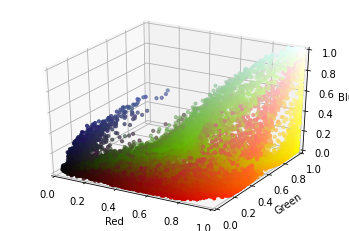

In [18]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cols[:,0], cols[:,1], cols[:,2], c=cols,s=10)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
plt.savefig('T7-veg_rgb.png',dpi=200,bbox_inches='tight')

### 7.5 Questions


After these exercises, you should be able to answer the following questions:
* What is the purpose of feature selection?
* How do feature selection and feature extraction differ?
* What is the result of Principal Component Analysis?
* How is the result of the K-Means algorithm?
* How can we use K-Means for vector quantization?